# Feature selection with Random Forest classifier 

In [2]:
from sklearn import datasets
import pandas as pd
import sklearn 
import numpy as np

iris = datasets.load_iris()
iris = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                     columns= iris['feature_names'] + ['target'])
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


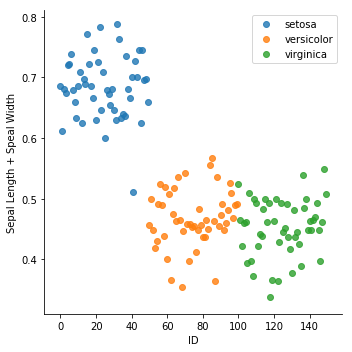

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["X"] = iris["sepal_width"]/ iris["sepal_length"]

sns.lmplot(x="ID", y="X", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.ylabel("Sepal Length + Speal Width")
plt.show()

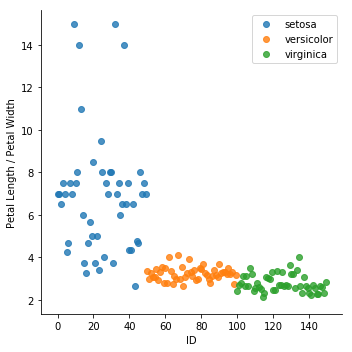

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
iris = sns.load_dataset("iris")
iris["ID"] = iris.index
iris["ratio"] = iris["petal_length"]/iris["petal_width"]

sns.lmplot(x="ID", y="ratio", data=iris, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.ylabel("Petal Length / Petal Width")
plt.show()

/home/resham/anaconda3/envs/dataMining/lib/python2.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


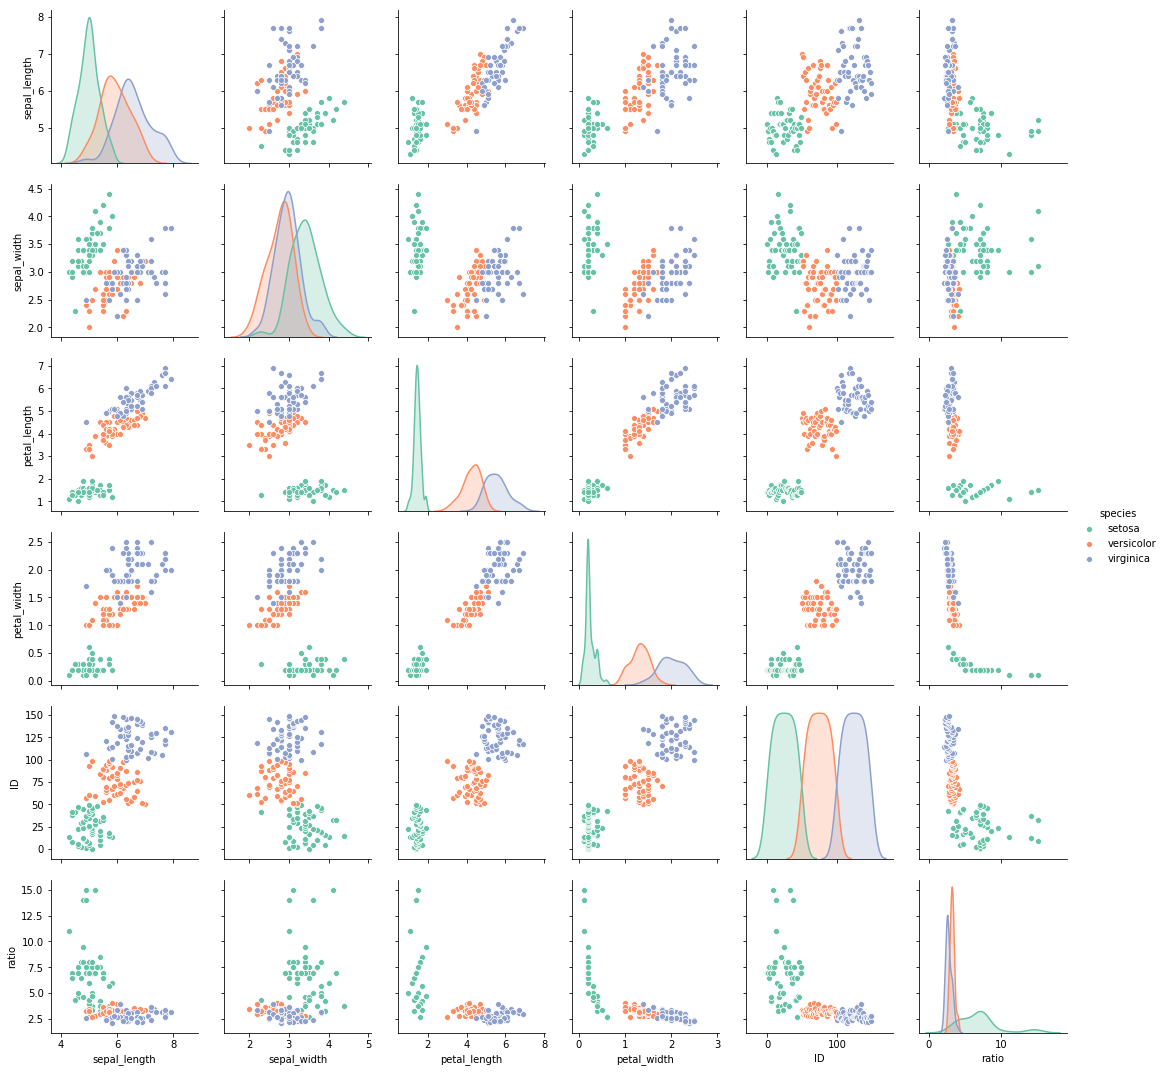

In [5]:
sns.pairplot(data=iris, hue='species', palette='Set2')

In [6]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('https://archive.ics.uci.edu/ml/'
                 'machine-learning-databases'
                 '/iris/iris.data', header=None)
df.head()

X = df.loc[:, 0:3].values
y = df.loc[:, 4].values
le = LabelEncoder()
y = le.fit_transform(y)
le.classes_

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

('Accuracy is: ', 0.9333333333333333)


/home/resham/anaconda3/envs/dataMining/lib/python2.7/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


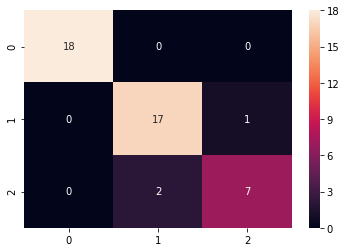

In [7]:
#Random classification for feature selection 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score,confusion_matrix
from sklearn.metrics import accuracy_score

# split data train 70 % and test 30 %
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=34)

#random forest classifier with n_estimators=10 (default)
clf_rf = RandomForestClassifier(random_state=43)      
clr_rf = clf_rf.fit(x_train,y_train)

ac = accuracy_score(y_test,clf_rf.predict(x_test))
print('Accuracy is: ',ac)
cm = confusion_matrix(y_test,clf_rf.predict(x_test))
sns.heatmap(cm,annot=True,fmt="d")

# Ranking  Iris features 

In [8]:
clf_rf_1 = RandomForestClassifier()      
clr_rf_1 = clf_rf_1.fit(x_train,y_train)
importances = clr_rf_1.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(x_train.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 2 (0.506032)
2. feature 3 (0.374132)
3. feature 0 (0.072967)
4. feature 1 (0.046870)
